### Student Information
Name: 彭敍溶

Student ID: 111164505

GitHub ID: #62976505

Kaggle name: KevinPong

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

---

### **Part 1: Take Homework Exercise**

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
test_df.head()

,id,text,emotion,intensity
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479
1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---

#### Exercise 1
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

train_count_vect = CountVectorizer()
train_counts = train_count_vect.fit_transform(train_df.text)

test_count_vect = CountVectorizer()
test_counts = test_count_vect.fit_transform(test_df.text)


train_frequencies = np.asarray(train_counts.sum(axis=0))[0]
test_frequencies = np.asarray(test_counts.sum(axis=0))[0]

In [6]:
# top 30 words for train dataset
train_sort_index = sorted(range(len(train_frequencies)), key=lambda k: train_frequencies[k], reverse=True)
train_sort_index_top_30 = train_sort_index[0:30]
train_top_30_words = train_count_vect.get_feature_names_out()[train_sort_index_top_30]

# top 30 words for test dataset
test_sort_index = sorted(range(len(test_frequencies)), key=lambda k: test_frequencies[k], reverse=True)
test_sort_index_top_30 = test_sort_index[0:30]
test_top_30_words = test_count_vect.get_feature_names_out()[test_sort_index_top_30]

print("Top 30 words in train dataset:")
print(train_top_30_words)

print()

print("Top 30 words in test dataset:")
print(test_top_30_words)

Top 30 words in train dataset:
['the' 'to' 'and' 'you' 'of' 'is' 'it' 'in' 'that' 'my' 'for' 'on' 'be'
 'me' 'this' 'so' 'have' 'not' 'just' 'but' 'with' 'at' 'can' 'all' 'like'
 'are' 'your' 'was' 'when' 'if']

Top 30 words in test dataset:
['the' 'to' 'and' 'it' 'of' 'you' 'is' 'in' 'for' 'that' 'my' 'on' 'be'
 'me' 'so' 'was' 'can' 'all' 'at' 'have' 'are' 'just' 'with' 'but' 'get'
 'like' 'not' 'this' 'up' 'your']


---

#### Exercise 2
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [7]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
train_data_tfidf_features_1000 = tfidf_1000.fit_transform(train_df['text'])
train_data_tfidf_features_1000.shape

c:\Users\User\.conda\envs\lab2_env\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 1000)

In [8]:
feature_names_1000 = tfidf_1000.get_feature_names_out()
feature_names_1000[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---

In [9]:
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [10]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [11]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

In [12]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 

In [14]:
# Function for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

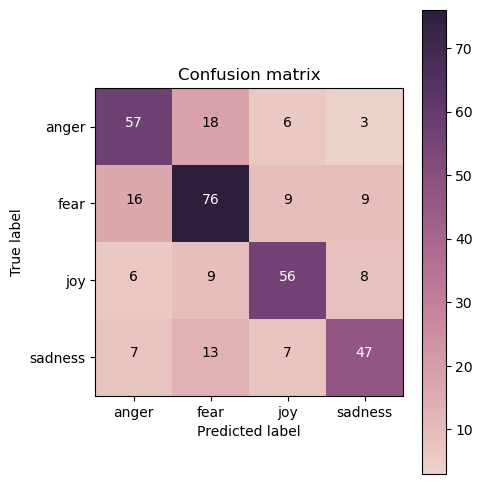

In [15]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---

#### Exercise 3
Can you interpret the results above? What do they mean?

The precision for every emotion is around 0.66 ~ 0.72. The recall for every emotion is around 0.64 ~ 0.71. Overall, I think it is a decent method for this problem, but there is definitely something can be improved. For example, different vectorizer could be tried. Also, a random forest could be tried instead of a single decision tree. 

---

#### Exercise 4
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

In [16]:
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()
model_NB.fit(X_train.toarray(), y_train)

GaussianNB()

In [17]:
y_test_pred_NB = model_NB.predict(X_test.toarray())
print(classification_report(y_true=y_test, y_pred=y_test_pred_NB))

              precision    recall  f1-score   support

       anger       0.53      0.73      0.61        84
        fear       0.79      0.59      0.68       110
         joy       0.65      0.81      0.72        79
     sadness       0.69      0.47      0.56        74

    accuracy                           0.65       347
   macro avg       0.66      0.65      0.64       347
weighted avg       0.67      0.65      0.65       347



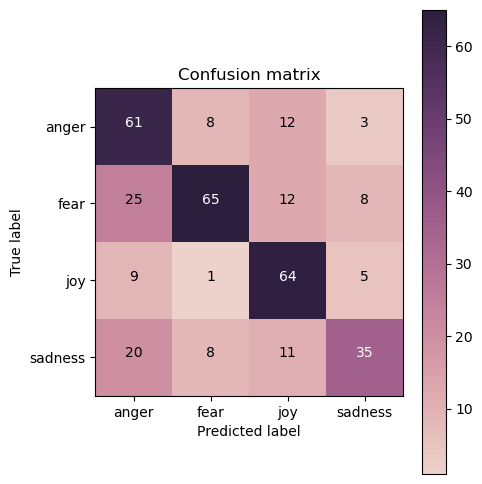

In [18]:
cm_NB = confusion_matrix(y_true=y_test, y_pred=y_test_pred_NB) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_NB, classes=my_tags, title='Confusion matrix')

---

#### Exercise 5
How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

**Precision**
| emotion | Decision Tree | Naive Bayes model |
| :---: | :---: | :---: |
| anger | 0.66 | 0.53 |
| fear | 0.66 | 0.79 |
| joy | 0.72 | 0.65 |
| sadness | 0.70 | 0.69 |


**Recall**
| emotion | Decision Tree | Naive Bayes model |
| :---: | :---: | :---: |
| anger | 0.68 | 0.73 |
| fear | 0.69 | 0.59 |
| joy | 0.71 | 0.81 |
| sadness | 0.64 | 0.47 |


**Prediction Counts**
| emotion | Decision Tree | Naive Bayes model |
| :---: | :---: | :---: |
| Predict as anger | 86 | 115 |
| Predict as fear | 116 | 82 |
| Predict as joy | 78 | 99 |
| Predict as sadness | 67 | 51 |

From the above form, we can see that for the precision part, Naive Bayes model only performs better that the emotion "fear". I think it is because the amount of fear data is the most among four kinds of emotions. And for the recall part, decision tree performs better with emotion "fear" and "sadness", while Naive Bayes model performs better with emotion "anger" and "joy". It seems that the decision tree model appear to predict emotion as "fear" and "sadness" more, while Naive Bayes model appear to predict emotion as "anger" and "joy" more.

---

In [19]:
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

---

#### Exercise 6
Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

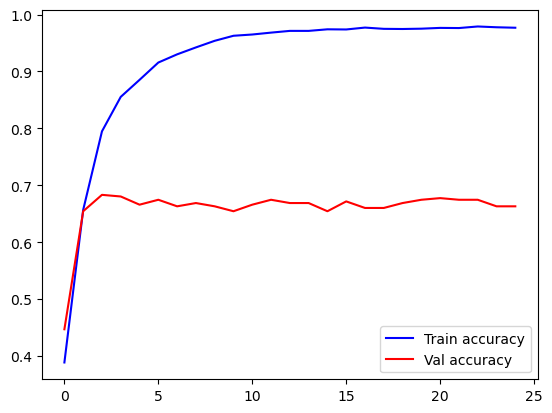

In [20]:
import matplotlib.pyplot as plt

train_accuracy = training_log['accuracy'].to_numpy()
val_accuracy = training_log['val_accuracy'].to_numpy()

plt.plot(train_accuracy, label='Train accuracy', color='b')
plt.plot(val_accuracy, label='Val accuracy', color='r')
plt.legend(loc='best')
plt.show()

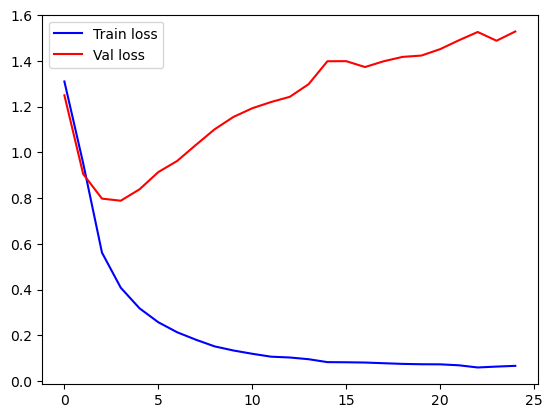

In [21]:
train_loss = training_log['loss'].to_numpy()
val_loss = training_log['val_loss'].to_numpy()

plt.plot(train_loss, label='Train loss', color='b')
plt.plot(val_loss, label='Val loss', color='r')
plt.legend(loc='best')
plt.show()

I think 4 might be the proper epoch number. As shown in the above figures, validation loss increases when epoch is greater than 4, which is caused by overfitting. This can also be proved from the accuracy figure. If we train for too many epoch, the model will fit too much to the training data.

---

#### Exercise 7
Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

What we want to do is try to combine the word vectors in the same sentence into a single sentence vector. Here are some methods to do it.
1. **Summation**
    - Advantages
        - Easy to implement
        - Easy to compute / fast
    - Disadvantages:
        - Do not preserve the order of the words
        - Treat all words equally
        - Sensitive to outliers

2. **Averaging**
    - Advantages
        - Easy to implement
        - Less sensitive to outlier compared to summation
    - Disadvantages:
        - Do not preserve the order of the words
        - Treat all words equally
        - May lose semantic information

3. **Weighted Summation**
    - Advantages
        - Can assign different weight based on importance
        - Can emphasis on specific word or representation
    - Disadvantages:
        - Do not preserve the order of the words 
        - Need to come up with a proper weight

---

In [22]:
from gensim.models import KeyedVectors

model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

---

#### Exercise 8
Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [23]:
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words_15 = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words_15 = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words_15 = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words_15 = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words_15: ', angry_words_15)
print('happy_words_15: ', happy_words_15)
print('sad_words_15: ', sad_words_15)
print('fear_words_15: ', fear_words_15)

target_words_15 = angry_words_15 + happy_words_15 + sad_words_15 + fear_words_15
print('\ntarget words 15: ')
print(target_words_15)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

angry_words_15:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words_15:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words_15:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words_15:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words 15: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 

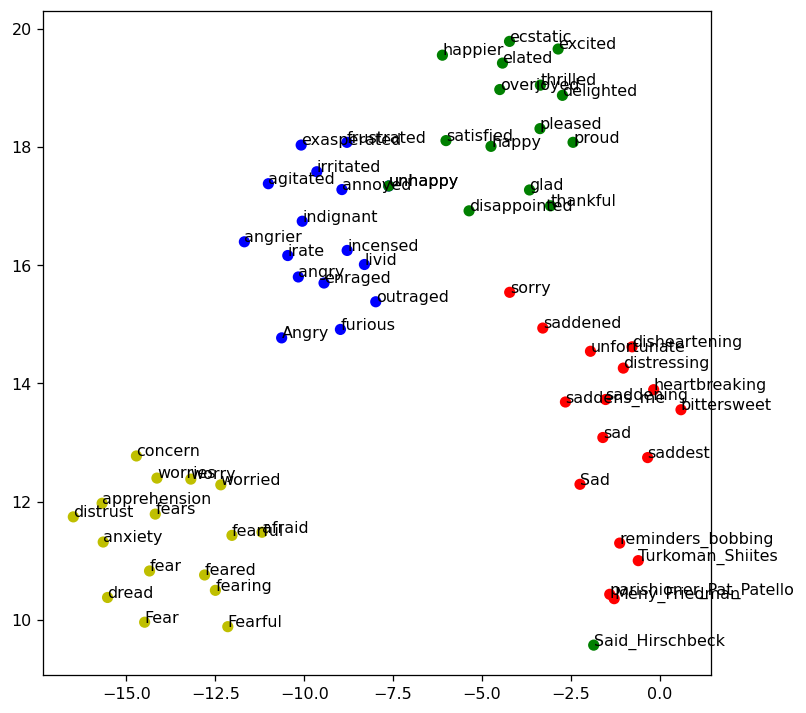

In [24]:
from sklearn.manifold import TSNE

## w2v model
model_15 = w2v_google_model

## prepare training word vectors
size = 200
target_size_15 = len(target_words_15)
all_word = list(model_15.index_to_key)
word_train = target_words_15 + all_word[:size]
X_train_15 = model_15[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne_15 = tsne.fit_transform(X_train_15)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne_15[:target_size_15, 0], X_tsne_15[:target_size_15, 1], c=color)
for label, x, y in zip(target_words_15, X_tsne_15[:target_size_15, 0], X_tsne_15[:target_size_15, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---

### **Part 2: Kaggle Competition**

Rank: 93/99

![pic0](img/pic0.png)

---

### **Part 3: Code for Kaggle Competition**

I use bag of word to tokenize the sentence, take the top 500 words as features, and use a decision tree to do the classification.

In [25]:
import json

raw_tweets = []
with open('tweets_DM.json') as f:
    for json_obj in f:
        dic = json.loads(json_obj)
        raw_tweets.append(dic)

In [26]:
tweet_ids = []
tweet_texts = []

i = 0
for tweet in raw_tweets:
    cur_tweet = tweet["_source"]
    tweet_ids.append(cur_tweet["tweet"]["tweet_id"])
    tweet_texts.append(cur_tweet["tweet"]["text"])

In [27]:
tweets_df = pd.DataFrame()

tweets_df['id'] = tweet_ids
tweets_df['text'] = tweet_texts

In [28]:
identification_df = pd.read_csv("data_identification.csv",sep=",", header=None,names=["id", "identification"])
emotion_df = pd.read_csv("emotion.csv", sep=",", header=None,names=["id", "emotion"])

In [29]:
whole_df = pd.merge(tweets_df, identification_df, on="id") 

In [30]:
train_df = whole_df[whole_df['identification'] == 'train']
test_df = whole_df[whole_df['identification'] == 'test']

In [31]:
train_df = pd.merge(train_df, emotion_df, on='id')

In [33]:
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

CountVectorizer(max_features=500,
                tokenizer=<function word_tokenize at 0x0000026E02C3D4C0>)

In [ ]:
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
X_test = BOW_500.transform(test_df['text'])

In [ ]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=66)

## training!
DT_model = DT_model.fit(X_train, y_train)

In [ ]:
y_test_pred = DT_model.predict(X_test)
test_df['emotion'] = y_test_pred.tolist()

In [ ]:
# Save predict result to csv file for submission
sub = test_df.drop(columns=['text', 'identification'])
sub.to_csv('submission.csv', index=False)

---